<a href="https://colab.research.google.com/github/harsh27004/ML_Models/blob/main/Number_Recognition_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage.feature import hog
from sklearn.datasets import fetch_openml


 Load MNIST Dataset

In [2]:
print("Loading MNIST dataset...")
data = fetch_openml('mnist_784', version=1)
X, y = data.data, data.target.astype(np.uint8)  # Convert labels to integers

Loading MNIST dataset...


Preprocess Data (Feature Extraction using HOG)

In [8]:

def preprocess_images(images):
    hog_features = []
    for img in images:
        img=np.array(img, dtype=np.float64).reshape(28,28)
        fd = hog(img, pixels_per_cell=(4, 4), cells_per_block=(2, 2), feature_vector=True)
        hog_features.append(fd)
    return np.array(hog_features)

Split Dataset

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.astype(np.float64).values.reshape(-1, 28, 28)
X_test = X_test.astype(np.float64).values.reshape(-1, 28, 28)
X_train_hog = preprocess_images(X_train)
X_test_hog = preprocess_images(X_test)

Train SVM Model

In [11]:
print("Training SVM model...")
svm_clf = SVC(kernel='linear', C=1.0)
svm_clf.fit(X_train_hog, y_train)

Training SVM model...


SVC(kernel='linear')

Function to Predict Digit from Image

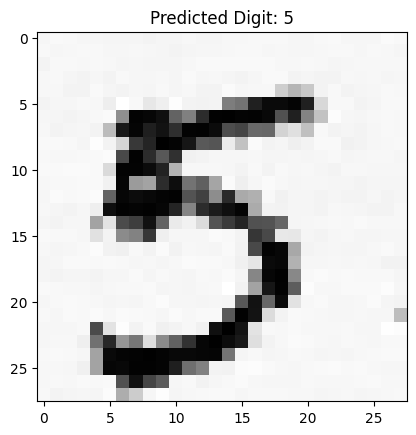

In [19]:
img = cv2.imread('/content/five.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = img / 255.0  # Normalize pixel values
fd = hog(img, pixels_per_cell=(4, 4), cells_per_block=(2, 2), feature_vector=True)
prediction = svm_clf.predict([fd])
plt.imshow(img, cmap='gray')
plt.title(f"Predicted Digit: {prediction[0]}")
plt.show()
img = img / 255.0  # Normalize pixel values